# Flower detection

#### a pattern recognition system project

Our goal in this project is to build a convolutional neural network that can recognize flowers based on images.

In [1]:
# Initial setup
import random

seed = 42

random.seed(seed)


In [2]:
#imports

import os
from pathlib import Path
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
dataset_path = os.path.abspath('./datasets/flowers')
data_dir = Path(dataset_path)
print(data_dir)

e:\info\IV-1\PD\flowers\datasets\flowers


e:\info\IV-1\PD\flowers\datasets\flowers\dandelion\10043234166_e6dd915111_n.jpg


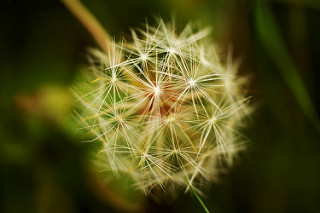

In [4]:
dandelion = list((data_dir/ 'dandelion').glob('*'))
print(dandelion[0])
PIL.Image.open(str(dandelion[0]))

We can print our classes

In [5]:
class_dirs = list((data_dir).glob('*'))
class_names= [cls.name for cls in class_dirs]
print(class_dirs)
print(class_names)

[WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers/daisy'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers/dandelion'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers/rose'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers/sunflower'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers/tulip')]
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


We create our training and validation sets

In [6]:
img_height, img_width = 180, 180
batch_size = 32

(train_ds, validation_ds) = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode = 'categorical',
    validation_split=0.2,
    subset='both',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Using 863 files for validation.


### First, we will use a pre-trained model

Thism gives us a multitude of benefits, such as:
- by using imagenet weights, we should get better results

In [7]:
resnet_model = Sequential()

pretrained_model = keras.applications.ResNet50(include_top=False, input_shape=(180,180,3), pooling='avg',
                                                classes=5, weights='imagenet')

In [8]:
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)

In [9]:
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= ['accuracy'])

In [11]:
resnet1 = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=3)

Epoch 1/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.6777 - loss: 1.0713 - val_accuracy: 0.8621 - val_loss: 0.3892
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8781 - loss: 0.3288 - val_accuracy: 0.8749 - val_loss: 0.3516
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - accuracy: 0.9328 - loss: 0.2052 - val_accuracy: 0.8610 - val_loss: 0.4092


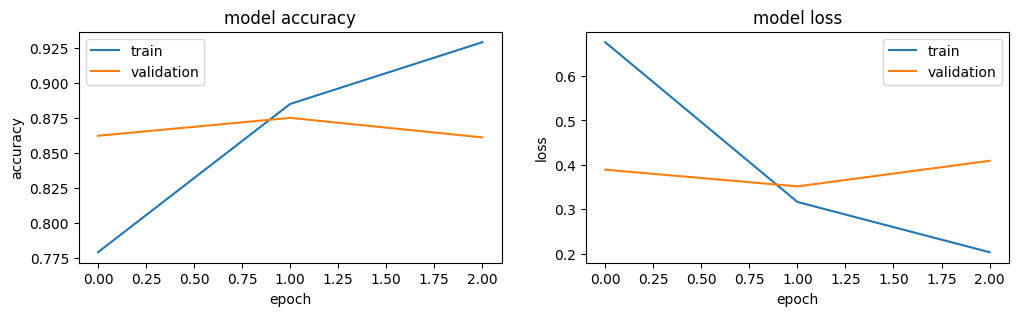

In [12]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(resnet1.history['accuracy'])
plt.plot(resnet1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(resnet1.history['loss'])
plt.plot(resnet1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()


# TODO:

- more epochs
- bigger nn
- google colab?
- train, val, test split